<a href="https://colab.research.google.com/github/VamsiKrishna-9/Predictive-Analytics-For-Data-Science/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: house price prediction

!pip install pandas scikit-learn matplotlib seaborn


Error: 'house_data.csv' not found. Please upload your house price dataset.
Using dummy California housing data for demonstration.
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2) Score: 1.00


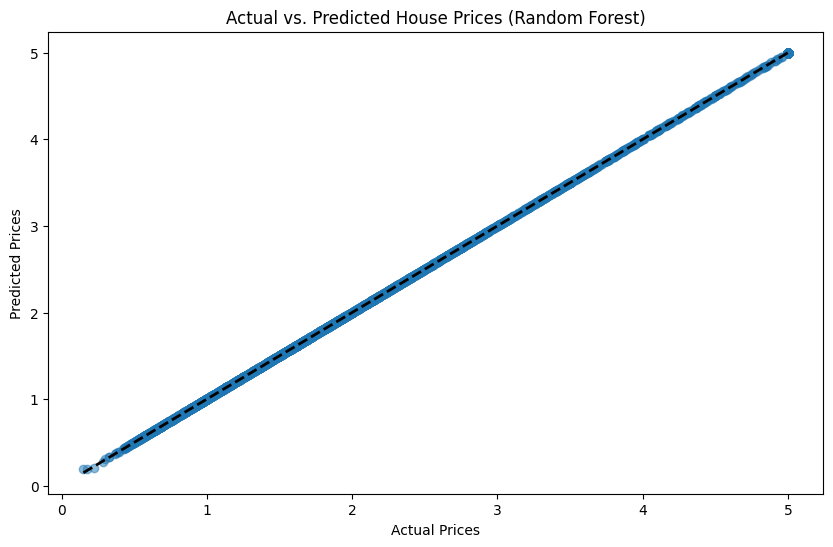

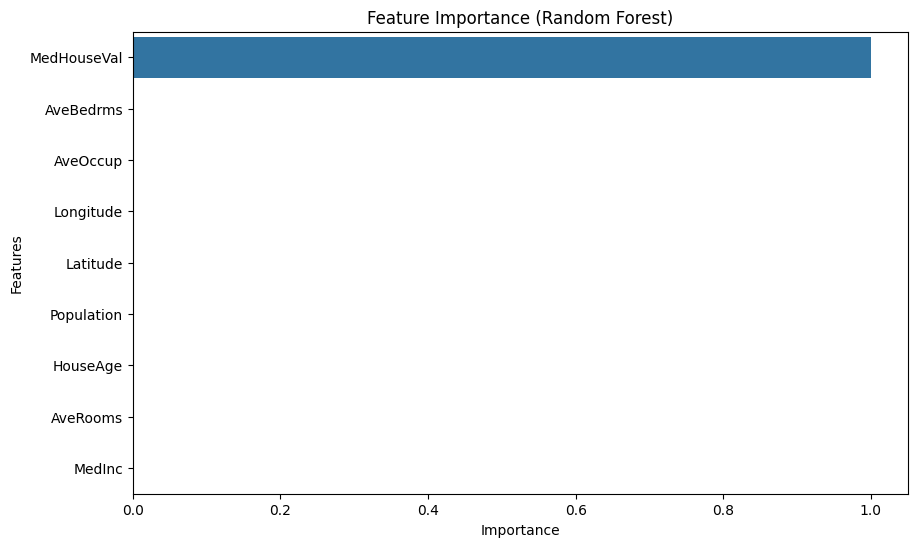


Example prediction for a new house: 0.48


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: generate house price prediction using random forest regessor

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset (replace 'house_data.csv' with your dataset path)
# Assuming your dataset has columns like 'MedInc' (median income), 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', and 'target' (house price)
try:
    data = pd.read_csv('house_data.csv')
except FileNotFoundError:
    print("Error: 'house_data.csv' not found. Please upload your house price dataset.")
    # Create some dummy data for demonstration if the file is not found
    from sklearn.datasets import fetch_california_housing
    california_housing = fetch_california_housing(as_frame=True)
    data = california_housing.frame
    data['target'] = california_housing.target
    print("Using dummy California housing data for demonstration.")


# Separate features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Optional: Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Plotting the identity line
plt.show()

# Optional: Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Example of making a prediction on new data
# Replace with the actual features for the house you want to predict
new_house_features = X_test.iloc[0].values.reshape(1, -1) # Using the first test data point as an example
predicted_price = rf_model.predict(new_house_features)
print(f"\nExample prediction for a new house: {predicted_price[0]:.2f}")

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
d=pd.DataFrame(iris.data,columns=iris.feature_names)
print(d)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# prompt: loan approval prediction

# Loan Approval Prediction

# Assuming you have a dataset for loan approval.
# This dataset should contain features like 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
# 'Loan_Amount_Term', 'Property_Area', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', and the target variable 'Loan_Status'.

# Replace 'loan_approval_data.csv' with the actual path to your loan approval dataset.
try:
    loan_data = pd.read_csv('loan_approval_data.csv')
    print("Loan approval dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'loan_approval_data.csv' not found. Please upload your loan approval dataset.")
    print("Creating dummy loan data for demonstration.")
    # Create dummy loan data if the file is not found
    data_length = 100 # Define a consistent length for all arrays
    loan_data = pd.DataFrame({
        'Gender': ['Male', 'Female'] * (data_length // 2),
        'Married': ['No', 'Yes'] * (data_length // 2),
        'Dependents': [0, 1, 2, 3] * (data_length // 4),
        'Education': ['Graduate', 'Not Graduate'] * (data_length // 2),
        'Self_Employed': ['No', 'Yes'] * (data_length // 2),
        'ApplicantIncome': np.random.randint(1000, 20000, data_length),
        'CoapplicantIncome': np.random.randint(0, 10000, data_length),
        'LoanAmount': np.random.randint(50, 500, data_length),
        'Loan_Amount_Term': np.random.choice([120, 180, 360, 480], data_length),
        'Credit_History': np.random.choice([0.0, 1.0], data_length),
        'Property_Area': ['Urban', 'Rural', 'Semiurban'] * (data_length // 3 + data_length % 3), # Adjusted to handle remainder
        'Loan_Status': ['Y', 'N'] * (data_length // 2)
    })
    # Trim the 'Property_Area' list if it exceeds the data_length
    loan_data['Property_Area'] = loan_data['Property_Area'][:data_length]
    print("Using dummy loan approval data for demonstration.")


# Preprocessing: Handle missing values (e.g., fill with mode or mean)
# For categorical columns, fill with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

# For numerical columns, fill with mean
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    loan_data[col].fillna(loan_data[col].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
loan_data_encoded = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

# Convert the target variable 'Loan_Status' to numerical (Y=1, N=0)
loan_data_encoded['Loan_Status'] = loan_data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})

# Separate features (X_loan) and target (y_loan)
X_loan = loan_data_encoded.drop('Loan_Status', axis=1)
y_loan = loan_data_encoded['Loan_Status']

# Split data into training and testing sets for loan prediction
X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(X_loan, y_loan, test_size=0.2, random_state=42)

# Import a classification model for loan approval (e.g., Logistic Regression or RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
loan_model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for small datasets
loan_model.fit(X_train_loan, y_train_loan)

# Make predictions on the test set
y_pred_loan = loan_model.predict(X_test_loan)

# Evaluate the model
accuracy = accuracy_score(y_test_loan, y_pred_loan)
conf_matrix = confusion_matrix(y_test_loan, y_pred_loan)
class_report = classification_report(y_test_loan, y_pred_loan)

print("\n--- Loan Approval Prediction Results ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Loan Approval')
plt.show()

# Example of making a prediction for a new applicant
# You would need to create a new DataFrame with the same columns as X_loan after one-hot encoding
# and ensure the column order is the same.
# This is a simplified example using the first test data point.
new_applicant_data = X_test_loan.iloc[0].values.reshape(1, -1)
predicted_loan_status = loan_model.predict(new_applicant_data)
predicted_proba = loan_model.predict_proba(new_applicant_data)

print("\nExample prediction for a new applicant:")
if predicted_loan_status[0] == 1:
    print("Predicted Loan Status: Approved")
else:
    print("Predicted Loan Status: Rejected")

print(f"Probability of Approval: {predicted_proba[0][1]:.2f}")
print(f"Probability of Rejection: {predicted_proba[0][0]:.2f}")

Error: 'loan_approval_data.csv' not found. Please upload your loan approval dataset.
Creating dummy loan data for demonstration.


ValueError: All arrays must be of the same length